<a href="https://colab.research.google.com/github/Rama-Lekshmi/mnist-classification/blob/main/DL_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image= X_train[0]

In [7]:
single_image.shape

(28, 28)

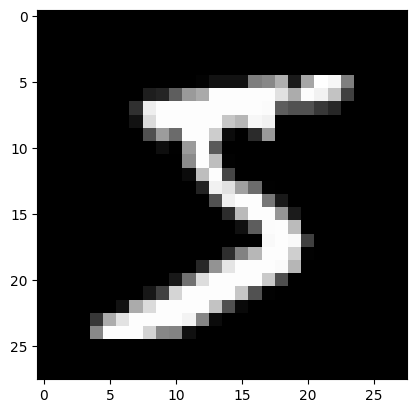

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()


0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:

X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

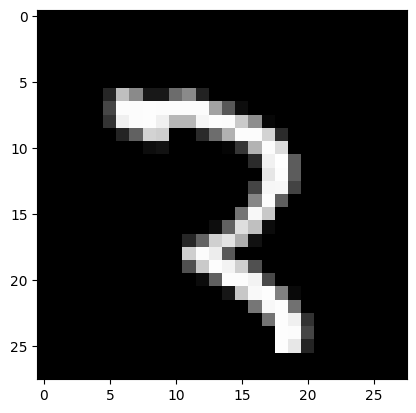

In [19]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [24]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [25]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                86544     
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                      

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [27]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.3268 - accuracy: 0.9032 - val_loss: 0.1211 - val_accuracy: 0.9634
Epoch 2/5
938/938 [==============================] - 26s 28ms/step - loss: 0.1059 - accuracy: 0.9686 - val_loss: 0.0826 - val_accuracy: 0.9740
Epoch 3/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0739 - accuracy: 0.9778 - val_loss: 0.0676 - val_accuracy: 0.9782
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0660 - val_accuracy: 0.9795
Epoch 5/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0503 - val_accuracy: 0.9835


In [28]:
metrics = pd.DataFrame(model.history.history)

In [32]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
metrics.head()

RAMA E.K. LEKSHMI
212222240082


,loss,accuracy,val_loss,val_accuracy
0,0.326828,0.903150,0.121098,0.9634
1,0.105852,0.968567,0.082643,0.9740
2,0.073862,0.977783,0.067595,0.9782
3,0.058484,0.982067,0.065951,0.9795
4,0.048371,0.985050,0.050302,0.9835


RAMA E.K. LEKSHMI
212222240082


<Axes: >

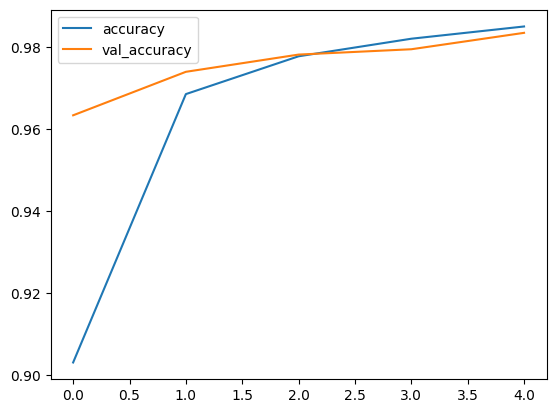

In [33]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
metrics[['accuracy','val_accuracy']].plot()

RAMA E.K. LEKSHMI
212222240082


<Axes: >

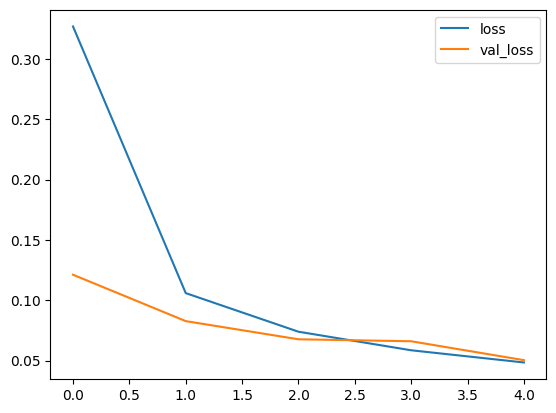

In [35]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
metrics[['loss','val_loss']].plot()

In [39]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

RAMA E.K. LEKSHMI
212222240082
313/313 [==============================] - 1s 4ms/step


In [38]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
print(confusion_matrix(y_test,x_test_predictions))

RAMA E.K. LEKSHMI
212222240082
[[ 972    0    2    0    0    0    1    3    2    0]
 [   0 1130    1    1    1    0    0    0    2    0]
 [   2    8 1006    4    2    0    0    7    3    0]
 [   0    0    2 1000    0    3    0    1    3    1]
 [   0    0    0    0  969    0    0    0    3   10]
 [   2    0    0    8    0  879    2    0    1    0]
 [   6    3    1    0    4   10  931    0    3    0]
 [   0    3    5    3    0    0    0 1009    1    7]
 [   5    1    2    5    2    3    0    2  948    6]
 [   2    1    0    2    6    2    0    2    3  991]]


In [40]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
print(classification_report(y_test,x_test_predictions))


RAMA E.K. LEKSHMI
212222240082
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [42]:
img = image.load_img('img3.jpg')


In [45]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [46]:
img = image.load_img('img3.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [47]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 140ms/step


In [48]:
print(x_single_prediction)

[5]


RAMA E.K. LEKSHMI
212222240082


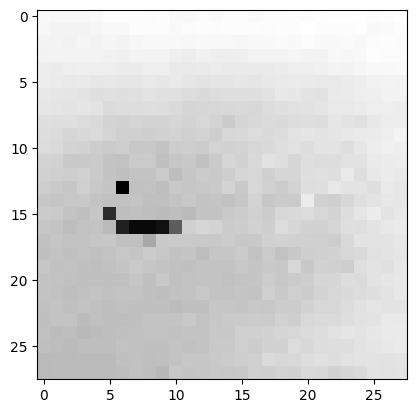

In [50]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [51]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [52]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [54]:
print("RAMA E.K. LEKSHMI")
print("212222240082")
print(x_single_prediction)

RAMA E.K. LEKSHMI
212222240082
[1]
